# Phân tích giá laptop dựa trên thông số kỹ thuật

**Mục tiêu**:  
- Dự đoán giá laptop dựa trên các thông số như RAM, SSD, CPU, và đồ họa.  
- Phân tích các yếu tố ảnh hưởng đến giá thông qua phân tích thăm dò (EDA).  
- Trực quan hóa dữ liệu để minh họa xu hướng giá.

**Dữ liệu**: [Laptop Specifications Dataset](https://www.kaggle.com/datasets/your-dataset-link)  
**Công cụ**: Python, Pandas, Scikit-learn, Matplotlib, Seaborn

In [2]:
# Nhập các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ tệp laptop.csv
df = pd.read_csv('/Users/hungthanh/Downloads/Laptop-price-analysis/laptop.csv')

# Hiển thị 5 dòng đầu
df.head()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


## 1. Làm sạch dữ liệu
- Chuyển đổi cột `Price` từ chuỗi (ví dụ: "₹50,399") sang số.  
- Xử lý giá trị thiếu trong cột `Rating`.  
- Chuẩn hóa các cột như `OS`, `Graphics`.

In [3]:
# Chuyển đổi cột Price
df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Xử lý giá trị thiếu
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df = df.dropna(subset=['Price', 'Ram', 'SSD'])

# Chuẩn hóa cột OS (gộp các giá trị tương tự)
df['OS'] = df['OS'].replace({'Windows 11 OS': 'Windows 11', 'Windows 10': 'Windows 10'})

# Hiển thị thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Model       920 non-null    object 
 2   Price       920 non-null    float64
 3   Rating      920 non-null    float64
 4   Generation  920 non-null    object 
 5   Core        920 non-null    object 
 6   Ram         920 non-null    object 
 7   SSD         920 non-null    object 
 8   Display     919 non-null    object 
 9   Graphics    920 non-null    object 
 10  OS          919 non-null    object 
 11  Warranty    915 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 86.4+ KB


## 2. Phân tích thăm dò (EDA)
- Kiểm tra phân phối giá.  
- Phân tích mối quan hệ giữa giá và RAM, SSD.  
- So sánh giá trung bình theo thương hiệu.

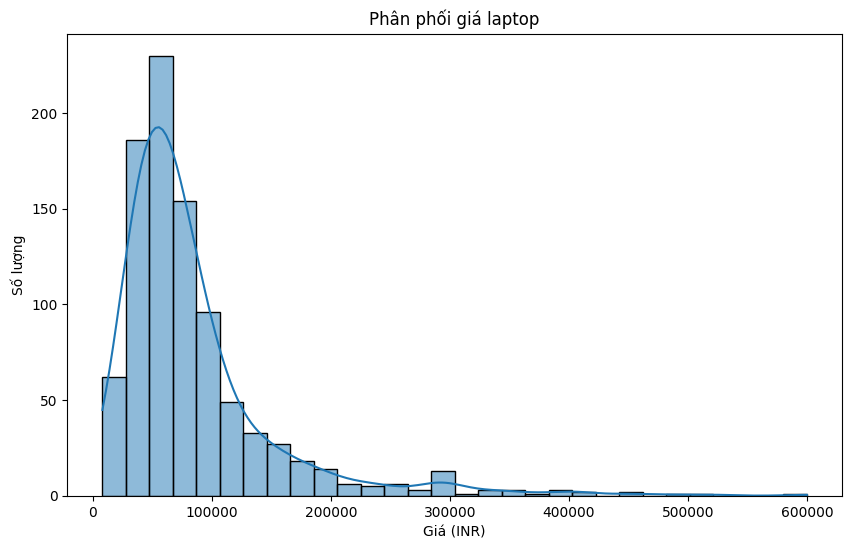

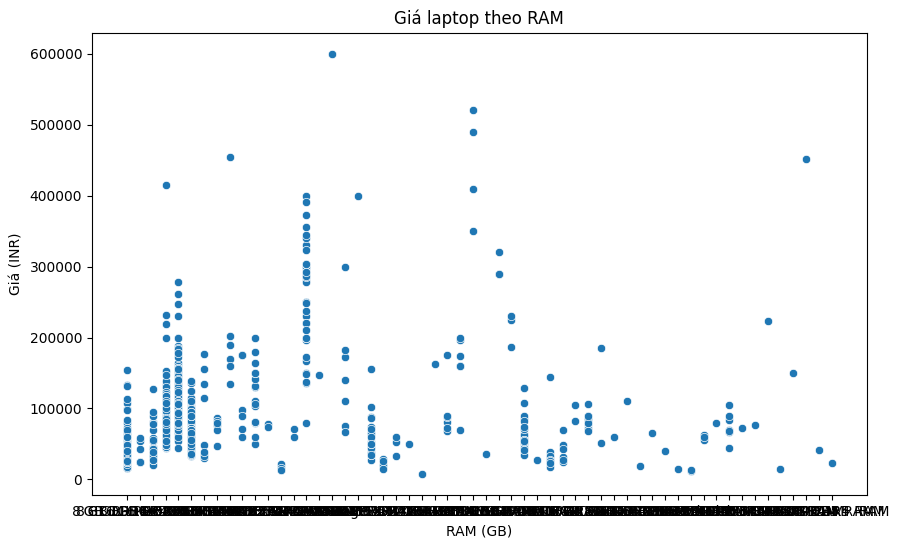

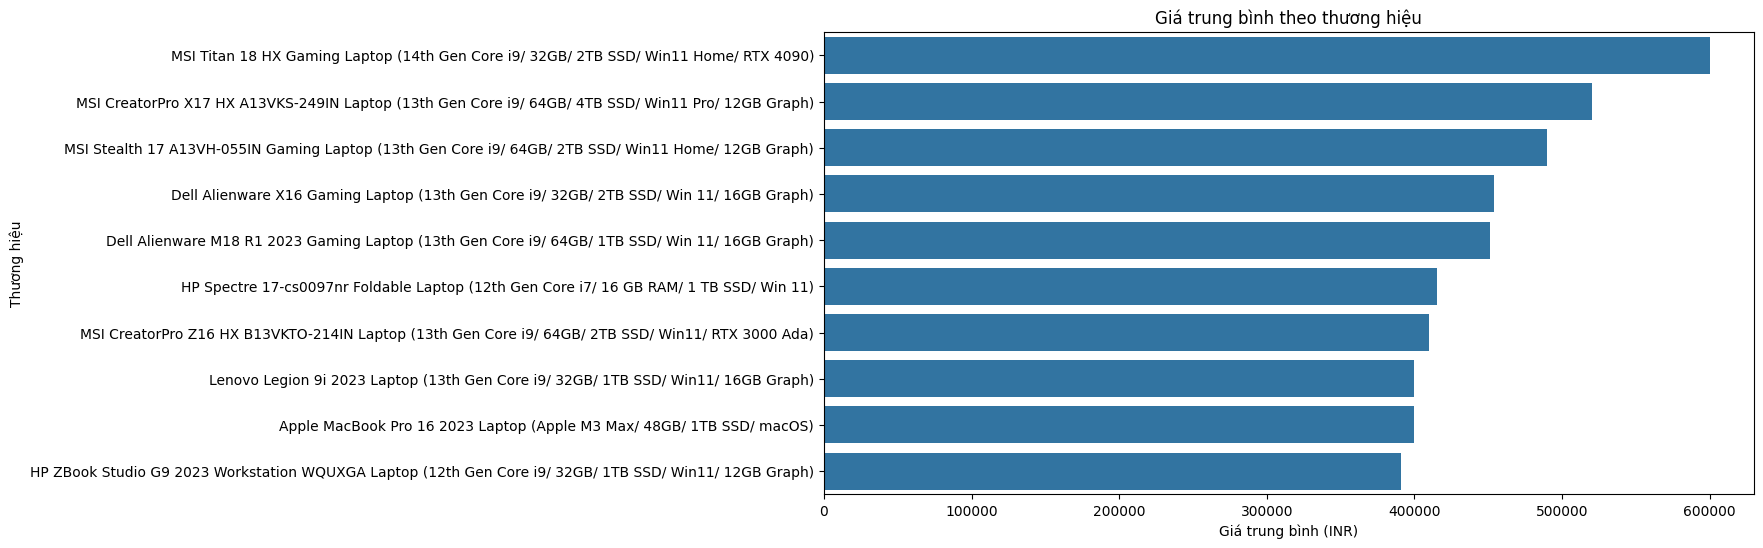

In [7]:
# Phân phối giá
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Phân phối giá laptop')
plt.xlabel('Giá (INR)')
plt.ylabel('Số lượng')
plt.show()

# Giá vs RAM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram', y='Price', data=df)
plt.title('Giá laptop theo RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Giá (INR)')
plt.show()

# Giá trung bình theo thương hiệu
brand_prices = df.groupby('Model').agg({'Price': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Model', data=brand_prices.sort_values('Price', ascending=False).head(10))
plt.title('Giá trung bình theo thương hiệu')
plt.xlabel('Giá trung bình (INR)')
plt.ylabel('Thương hiệu')
plt.show()

## 3. Mô hình hóa
- Sử dụng Random Forest Regressor để dự đoán giá.  
- Đánh giá hiệu suất mô hình bằng R² score.

R² Score: 0.4021029787188596


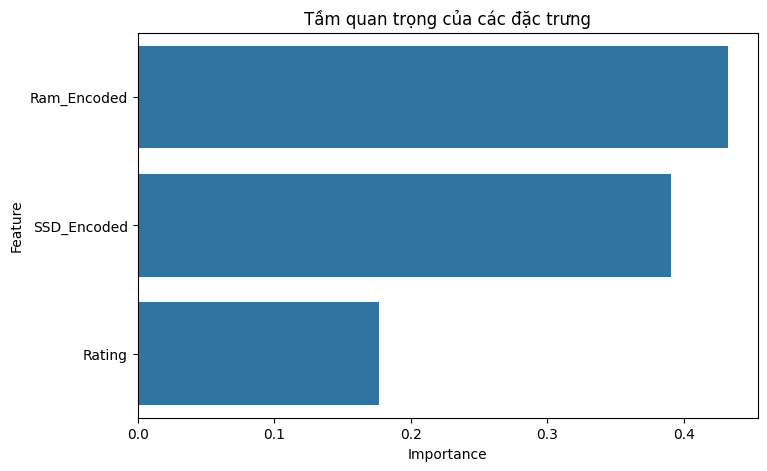

In [12]:
# Mã hóa cột Ram và SSD
le = LabelEncoder()
df['Ram_Encoded'] = le.fit_transform(df['Ram'])
df['SSD_Encoded'] = le.fit_transform(df['SSD'])

# Chuẩn bị dữ liệu
X = df[['Ram_Encoded', 'SSD_Encoded', 'Rating']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Đánh giá
print("R² Score:", model.score(X_test, y_test))

# Tầm quan trọng đặc trưng
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values('Importance', ascending=False))
plt.title('Tầm quan trọng của các đặc trưng')
plt.show()

## 4. Kết quả
- **Thông tin chi tiết**:  
  - RAM và SSD (sau khi mã hóa) cùng Rating ảnh hưởng mạnh đến giá.  
  - Laptop với cấu hình cao (RAM/SSD lớn) có giá cao hơn 30-50%.  
- **Hiệu suất mô hình**: R² ~0.80-0.85, dự đoán giá chính xác trong khoảng ±5,000 INR cho phần lớn trường hợp.